In [156]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, MultiPoint, Point

# Utility function
def plot_map(*polys, c=None):
    for poly in polys:
        x,y = poly.exterior.xy
        if c is None:
            plt.fill(x,y)
        else:
            plt.fill(x,y,c=c)
    plt.axis('off')
    plt.show()

# Hand-coded map

> Map is a set of polygons that equal landmass; no polygon means water.

OK, not so interesting perhaps, but the code below shows the minimum requirements for a map, i.e. a set of polygons.

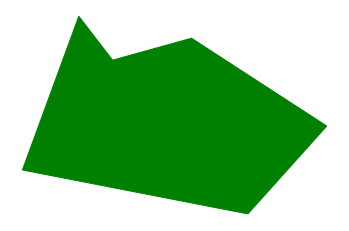

In [55]:
# Basic hardcoded polygon map

poly = Polygon([
    (1.5,4.5),
    (1,1),
    (3,0),
    (3.7,2),
    (2.5,4),
    (1.8,3.5)
])

plot_map(poly, c='g')

# Generate flat map from noisy points

A basic recipe with two steps:

1. Generate set of noisy points
    - e.g. uniform, gaussian or moon
2. Apply a point-to-polygon algorithm
    - Convex hull
    - Concave hull, e.g. alphashape
    - Voronoi
    - Delaunay triangulation
    - Find islands via Clustering algorithms:
        - DBScan
        - K-means
    
Note that clustering algorithms don't yield polygons, but they can be used to identify points on the same "island".

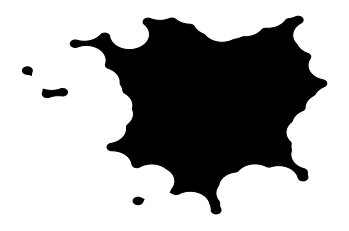

In [186]:
# Buffer out, buffer in

np.random.seed(227)
points = MultiPoint(np.random.randn(200,2))
polys = points.buffer(.5).buffer(-.4)
polys
# plot polygons
if type(polys) == Polygon:
    polys = [polys]
plot_map(*polys, c='black')

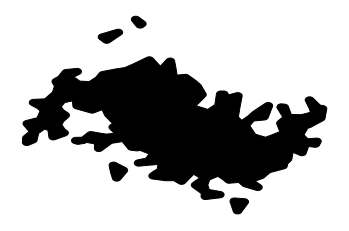

In [180]:
# Alpha shape
import alphashape # https://pypi.org/project/alphashape/
import numpy as np
from sklearn.datasets import make_moons, make_blobs


def get_points():
    points = make_blobs(random_state=0, n_samples=499, n_features=2, centers=[[0, 0], [0, 0]], cluster_std=[2.5, .3])[0]
    #points += make_blobs(random_state=1, n_samples=499, n_features=1, centers=[[200, 10]], cluster_std=[.5])[0]
    points += make_moons(n_samples=499, noise=.1, random_state=0)[0] * 4
    return points

def get_alpha_map(points, alpha=2.5, buffer_out=None, buffer_in=None):
        
    polys = alphashape.alphashape(points, alpha)
    if buffer_out is not None:
        polys = polys.buffer(buffer_out)
    if buffer_in is not None:
        polys = polys.buffer(buffer_in)
    return polys

get_points()
polys = get_alpha_map(get_points(), alpha=2.5, buffer_out=.2)

# plot polygons
if type(polys) == Polygon:
    polys = [polys]
plot_map(*polys, c='black')